#**Proyecto Aprendizaje de máquinas: Detección de cáncer de mama**




El objetivo de este proyecto es realizar un análisis detallado de la información que permita la implementación de modelos de machine learning para detectar si la masa mamaria presenta una condición benigna o maligna. Se implementaran diferentes modelos y se evaluara para obtener el de mayor rendimiento y precisión para el caso de estudio.

**CASO DE ESTUDIO**


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. 

Dentro de las imágenes se estudiaron las siguientes características, que además son las variables de interés para el desarrllo de los modelos de Machine Learning.

b) textura (desviación estándar de los valores de la escala de grises)

a) radio (media de las distancias desde el centro a los puntos en el perímetro)

c) perímetro

d) área

e) suavidad (variación local en las longitudes de los radios)

f) compacidad (perímetro ^ 2 / área - 1.0)

g) concavidad (severidad de las porciones cóncavas del contorno)

h ) puntos cóncavos (número de porciones cóncavas del contorno)

i) simetría

j) dimensión fractal ("aproximación de la línea de costa" - 1)

Y la variable respuesta es el diagnóstico sobre la masa mamaria:
Diagnóstico (M = maligno, B = benigno)

# Análisis Exploratorio de Datos

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

#Arbol
# Librerias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy as np

#SVM
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#KNN y Naive Bayes
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#XGBoost
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import pandas as pd
import xgboost as xgb
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy as np

#RN
from sklearn.neural_network import MLPClassifier

#KNN
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Random forest y RL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lectura de la base de datos
data_cancer =  pd.read_csv("/content/drive/MyDrive/Trabajo final_Aprendizaje_Maquinas/data.csv", sep=";")
data_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Visualización completa del data set
pd.set_option('display.max_columns', None)
data_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Dimensión de los datos
print("Tamaño del dataset - filas, columnas:", data_cancer.shape)
print("Cantidad de valores faltantes por columna:\n", data_cancer.isna().sum(), sep = "")

Tamaño del dataset - filas, columnas: (569, 32)
Cantidad de valores faltantes por columna:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_di

In [ ]:
#Concentración de los casos de interes
sns.countplot(x = "diagnosis", data = data_cancer)
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de pacientes", fontweight = "black", fontsize = 12)
plt.title("Cantidad de pacientes por tumores Benignos o Malignos", fontsize=18, color="black")
plt.show()

NameError: ignored

In [ ]:
print("los casos buenos son" , 357/(357+212))
print("los casos malos son" , 212/(357+212))

los casos buenos son 0.6274165202108963
los casos malos son 0.37258347978910367


In [ ]:
data_cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [ ]:
#Detalle descriptivo
del data_cancer["id"]
descripcion = data_cancer.describe()
descripcion

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Análisis de desviaciones
desviaciones = pd.DataFrame(descripcion.iloc[2])
desviaciones.reset_index(inplace=True)
desviaciones.columns = ["variable","Desviacion"]
desviaciones.sort_values(by=['Desviacion'],ascending=False)

,variable,Desviacion
23,area_worst,569.356993
3,area_mean,351.914129
13,area_se,45.491006
22,perimeter_worst,33.602542
2,perimeter_mean,24.298981
21,texture_worst,6.146258
20,radius_worst,4.833242
1,texture_mean,4.301036
0,radius_mean,3.524049
12,perimeter_se,2.021855


In [ ]:
data_mediad = data_cancer[['diagnosis','area_mean', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [ ]:
data_desv = data_cancer[['diagnosis','area_se', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

In [ ]:
data_maximo = data_cancer[['diagnosis','area_worst','radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']]

In [ ]:
sns.pairplot(data_mediad, hue = "diagnosis")

In [ ]:
sns.pairplot(data_desv, hue = "diagnosis")

In [ ]:
sns.pairplot(data_maximo, hue = "diagnosis")

In [ ]:
plt.figure(figsize = (6.4*3,4.8*3))
plt.subplot(3,3,1)## numero de filas 1, numero de columnas 3 graficos 2 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "area_mean")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Promedio de area", fontweight = "black", fontsize = 12)
plt.title("Distribucion del area promedio", fontsize=18, color="black")

plt.subplot(3,3,2)## numero de filas 1, numero de columnas 3 graficos1 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "texture_mean")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Textura media", fontweight = "black", fontsize = 12)
plt.title("Distribucion Textura media", fontsize=18, color="black")

plt.subplot(3,3,3) ## numero de filas 1, numero de columnas 3 graficos 3 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "perimeter_mean")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Perimetro medio", fontweight = "black", fontsize = 12)
plt.title("Distribucion del Perimetro medio", fontsize=18, color="black")


plt.subplot(3,3,4) ## numero de filas 1, numero de columnas 3 graficos 3 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "concave points_mean")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Concavidad media", fontweight = "black", fontsize = 12)
plt.title("Distribucion de la Concavidad", fontsize=18, color="black")


plt.subplot(3,3,5) ## numero de filas 1, numero de columnas 3 graficos 3 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "concave points_worst")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Concavidad maxima", fontweight = "black", fontsize = 12)
plt.title("Distribucion de la Concavidad maxima", fontsize=18, color="black")


plt.subplot(3,3,6) ## numero de filas 1, numero de columnas 3 graficos 3 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "area_se")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Desviacion estandar del area", fontweight = "black", fontsize = 12)
plt.title("Distribucion de Desviacion estandar del area", fontsize=18, color="black")


plt.subplot(3,3,7) ## numero de filas 1, numero de columnas 3 graficos 3 de 3
sns.boxplot(data = data_cancer, x = "diagnosis", y = "perimeter_worst")
plt.xlabel("Diagnostico Tumor", fontweight = "black", fontsize = 12)
plt.ylabel("Perimetro  maximo", fontweight = "black", fontsize = 12)
plt.title("Distribucion perimetro maximo", fontsize=18, color="black")

plt.tight_layout() ## es una funcion de diseno del grafico
# plt.savefig('DS_Bitacora_06_Ejemplos_puntos_y_lineas.png', dpi = 300)
plt.show()

In [ ]:
#Base para modelos
datamodelo =data_cancer[["diagnosis",'area_mean','perimeter_mean',"concave points_mean",
                         'concave points_worst',"area_se","perimeter_worst"]]

In [ ]:
datamodelo.groupby('diagnosis')['area_mean'].describe()

In [ ]:
datamodelo.groupby('diagnosis')['perimeter_mean'].describe()

In [ ]:
datamodelo.groupby('diagnosis')['concave points_mean'].describe()

In [ ]:
datamodelo.groupby('diagnosis')['concave points_worst'].describe()

In [ ]:
datamodelo.groupby('diagnosis')['area_se'].describe()

In [ ]:
datamodelo.groupby('diagnosis')['perimeter_worst'].describe()

In [ ]:
#Gráfico de correlacción
corr = datamodelo.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

sns.heatmap(
    corr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -2,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = False,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 40,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
# Tabla de correlacciones
corr

**Separación de la base de datos en las variables regresoras y la 

---

variable respuesta, además del escalamiento o normalización de las X´s**


In [ ]:
X = datamodelo_train.drop(columns ="diagnosis",axis = 1)
y = datamodelo_train.diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **CRP**

In [ ]:
#Lectura del pickle
!pip install pickle

In [ ]:
import pickle as pk

In [ ]:
with open('/content/drive/MyDrive/CRP/TRABAJO FINAL/dataimagenes.pickle', 'rb') as file:
  data=pickle.load(file)

In [ ]:
print(data)

In [ ]:
x_train = data[0]
y_train= data[1]
x_test= data[2]
y_test= data[3]

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
y_train

In [ ]:
#y_test[np.where(y_test=='NORMAL')]=0
#y_test[np.where(y_test=='PNEUMONIA')]=1
#y_test = y_test.astype(np.int)
#y_test

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

#REGRESIÓN LOGÍSTICA

In [ ]:
seed = 7
scoring = 'accuracy'

In [ ]:
#Validación Cruzada
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))

# Evaluación de los modelos
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.928351 (0.074492)
RFC: 0.867414 (0.187577)


In [ ]:
F1_RL= results[0].mean()
F1_RF= results[1].mean()
print(F1_RL)
print(F1_RF)

0.9283510567386377
0.8674143186122235


In [ ]:
#Comparación de los modelos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#matriz confusión entrenamiento
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictionsLR = logreg.predict(X_test)
print(f1_score(y_test, predictionsLR, average='macro'))
print(confusion_matrix(y_test, predictionsLR))
print(classification_report(y_test, predictionsLR))

0.6883622015472084
[[ 89 145]
 [  6 384]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.38      0.54       234
   PNEUMONIA       0.73      0.98      0.84       390

    accuracy                           0.76       624
   macro avg       0.83      0.68      0.69       624
weighted avg       0.81      0.76      0.73       624



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
F1_rl= accuracy_score(y_test, predictionsLR)
print(F1_rl)

0.7580128205128205




#RANDOM FOREST

In [ ]:
#matriz confusión entrenamiento
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictionsRF = RF.predict(X_test)
print(f1_score(y_test, predictionsRF, average='macro'))
print(confusion_matrix(y_test, predictionsRF))
print(classification_report(y_test, predictionsRF))

0.7434398615462581
[[110 124]
 [  5 385]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.47      0.63       234
   PNEUMONIA       0.76      0.99      0.86       390

    accuracy                           0.79       624
   macro avg       0.86      0.73      0.74       624
weighted avg       0.83      0.79      0.77       624



In [ ]:
F1_rf= accuracy_score(y_test, predictionsRF)
print(F1_rf)

0.7932692307692307


# ARBOL DE CLASIFICACIÓN

In [ ]:
# Diseño del árbol de clasificación
clf= tree.DecisionTreeClassifier()
clf= clf.fit(X_train, y_train)

# grid search
max_depth = range(1, 5) 
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
kf = KFold(n_splits=5)
score = clf.score(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy")
preds = clf.predict(X_test)
score_pred = accuracy_score(y_test, preds)
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs= None, cv=None, verbose=0)
grid_result = grid_search.fit(X_train, y_train)

# Resumen de resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
a = means   
indice_max = a.argmax()
indice_max= indice_max+1
print(indice_max)    

# Modelo Final
clf = DecisionTreeClassifier(max_depth= indice_max, criterion= 'gini', random_state= 123)
clf.fit(X_train, y_train)
y_pred_arbol= clf.predict(X_test)

#return
print("----------------------------------------------")
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred_arbol))
print("----------------------------------------------")
print("Indicadores de precision, recall y f1-score: ")
print("----------------------------------------------")
print(classification_report(y_test, y_pred_arbol))
print("----------------------------------------------")
print("Resultados validación cruzada con 5 splits son: ")
print("----------------------------------------------")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
print("Metrica en Test", score_pred)
print("----------------------------------------------")
print("----------------------------------------------")

# report performance
print('ARBOL: ', scores.mean(), scores.std())

NameError: ignored

In [ ]:
F1_ARBOL= clf.score(X_test, y_test)
F1_arbol= accuracy_score(y_test, y_pred_arbol)
print(F1_ARBOL)
#print(F1_arbol)

0.7019230769230769


#SVM

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

5

In [ ]:
### seleccion de hiperparametros
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}] ## Hiperparametros
#y_train.reset_index(drop=True, inplace=True)
for train_index, test_index in kf.split(X_train):
    x_train, x_Val = X_train[train_index], X_train[test_index]
    Y_train, y_Val = y_train[train_index], y_train[test_index]
    #Validacion = Validacion+1
    #print("k-fold: "+ str(Validacion))
    
    Modelo_svm = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % 'precision')
    Modelo_svm.fit(x_train,Y_train)
    print(Modelo_svm.best_params_)
    print()
    means = Modelo_svm.cv_results_['mean_test_score']
    stds = Modelo_svm.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, Modelo_svm.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

0.963 (+/-0.038) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.464 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.034) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.960 (+/-0.035) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.929 (+/-0.055) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.946 (+/-0.037) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.922 (+/-0.042) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.925 (+/-0.068) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.905 (+/-0.053) for {'C': 1, 'kernel': 'linear'}
0.905 (+/-0.053) for {'C': 10, 'kernel': 'linear'}
0.905 (+/-0.053) for {'C': 100, 'kernel': 'linear'}
0.905 (+/-0.053) for {'C': 1000, 'kernel': 'linear'}
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

0.944 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.904 (+/-0.034) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.954 (+/-0.043) for {'C': 10, 'gamma': 0.001, 'kernel': 'r

In [ ]:
## validacion cruzada
F1_Train_svm = []
Modelo = SVC( C=1000, kernel='linear')
k = 0
for train_index, test_index in kf.split(X_train):
    x_train, x_Val = X_train[train_index], X_train[test_index]
    Y_train, y_Val = y_train[train_index], y_train[test_index]   
    Modelo_svm.fit(x_train,Y_train)
    
    k += 1
    print("k-fold: "+ str(k))
    y_pred = np.array(Modelo_svm.predict(x_Val))
    F1 = f1_score(y_true = y_Val, y_pred = y_pred, average='macro')
    F1_Train_svm.append(F1)
F1_Train_svm = np.array(F1_Train_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k-fold: 1


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k-fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k-fold: 3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k-fold: 4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k-fold: 5


In [ ]:
F1_Train_svm = F1_Train_svm.mean()
F1_Train_svm

0.93299473457537

In [ ]:
Modelo = SVC( C=1000, kernel='linear')
Modelo.fit(X_train,y_train)
y_pred =  Modelo.predict(X_test)
F1_Test_svm = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
F1_Test_svm

0.933291867516716

#NAIVE BAYES

In [ ]:
#validacion cruzada 
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
modelNB = GaussianNB()
# evaluate model
scoresNB = cross_val_score(modelNB, X_train, y_train, scoring=('f1_macro'), cv=cv, n_jobs=-1)

# report performance
F1_Train_NB = mean(scoresNB)
print('F1 NB: %.3f (%.3f)' % (mean(scoresNB), std(scoresNB)))

F1 NB: 0.926 (0.022)


In [ ]:
#modelado naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.93
Accuracy of GNB classifier on test set: 0.93


In [ ]:
predgnb = gnb.predict(X_test)

F1_Test_nb = f1_score(y_true = y_test, y_pred = predgnb, average='macro')
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))
print(F1_Test_nb)

[[86  4]
 [ 6 47]]
              precision    recall  f1-score   support

           B       0.93      0.96      0.95        90
           M       0.92      0.89      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

0.9244505494505495


# XGBOOST (Extreme Gradient Boosting)

In [ ]:
!pip3 install xgboost

In [ ]:
# Definición de las covariables X y variable respuesta Y
X = datamodelo_train.drop('diagnosis', axis=1)
y = datamodelo_train.diagnosis

# Particion base train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Proceso de normalización de los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Diseño del árbol de clasificación
clf = XGBClassifier()
clf = clf.fit(X_train, y_train)

# grid search
n_estimators = range(1, 20)
param_grid = dict(n_estimators=n_estimators)
kf = KFold(n_splits=5)
score = clf.score(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="f1_macro")
preds = clf.predict(X_test)
score_pred = accuracy_score(y_test, preds)
grid_search = GridSearchCV(clf, param_grid, scoring="f1_macro", n_jobs= None, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
    
# Resumen de resultados
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
a = means   
indice_max = a.argmax()
print(indice_max)
# Modelo Final
clf_XGB = XGBClassifier(
    n_estimators=indice_max, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None)  
clf_XGB.fit(X_train, y_train)
y_pred_xgb= clf_XGB.predict(X_test)

#return
print("----------------------------------------------")
print('Accuracy of xgboost on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred_xgb))
print("----------------------------------------------")
print("Indicadores de precision, recall y f1-score: ")
print("----------------------------------------------")
print(classification_report(y_test, y_pred_xgb))
print("----------------------------------------------")
print("Resultados validación cruzada con 5 splits son: ")
print("----------------------------------------------")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
print("Metrica en Test", score_pred)
print("----------------------------------------------")
print("----------------------------------------------")

# report performance
F1_XGB=scores.mean()
print(F1_XGB)
print('XGB: ', scores.mean(), scores.std())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2
----------------------------------------------
Accuracy of xgboost on test set: 0.94
Matriz de confusión: 
[[105   2]
 [ 15  49]]
----------------------------------------------
Indicadores de precision, recall y f1-score: 
----------------------------------------------
              precision    recall  f1-score   support

           B       0.88      0.98      0.93       107
           M       0.96      0.77      0.85        64

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171

----------------------------------------------
Resultados validación cruzada con 5 splits son: 
----------------------------------------------
Metricas cross_validation [0.97150997 0.97395833 0.92327366 0.92121011 0.83729639]
Media de cross_validation 0.9254496909919544
Metrica en Test 0.9415204678362573
----------------------------------------------
----------------------------------------------
0

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.9s finished


In [ ]:
# Prueba con basemodelo_test
#Test = datamodelo_test.drop("diagnosis", axis=1)
#Test= scaler.transform(Test)
#Test_y= datamodelo_test['diagnosis']
y_pred_arbol_XGB= clf_XGB.predict(X_test)
print(confusion_matrix(y_test, y_pred_arbol_XGB))
print('F1 Decision Tree classifier on test set: {:.2f}'
     .format(clf_XGB.score(X_test, y_test)))

[[105   2]
 [ 15  49]]
F1 Decision Tree classifier on test set: 0.90


In [ ]:
F1_xgb=clf_XGB.score(X_test, y_test)
F1_xgb

0.9005847953216374

# REDES

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [ ]:
F1_Train_RN = f1_score(y_true = y_train, y_pred = predict_train, average='macro')
F1_Test_RN = f1_score(y_true = y_test, y_pred = predict_test, average='macro')


# KNN



In [ ]:
##validacion cruzada KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
modelKNN = KNeighborsClassifier()
# evaluate model
scoresKNN = cross_val_score(modelKNN, X_train, y_train, scoring=('f1_macro'), cv=cv, n_jobs=-1)
F1_Train_KNN = mean(scoresKNN)

# report performance
print('F1 KNN: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

F1 KNN: 0.927 (0.020)


In [ ]:
#modelado knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.95


In [ ]:
predknn = knn.predict(X_test)

F1_Test_knn = f1_score(y_true = y_test, y_pred = predknn, average='macro')
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))
print(F1_Test_knn)

[[106   1]
 [  7  57]]
              precision    recall  f1-score   support

           B       0.94      0.99      0.96       107
           M       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

0.9490312965722801


# COMPETENCIA DE MODELOS

In [ ]:
Modelosfinal = pd.DataFrame({"Modelo":["Regresion Logistica","Random Forest",
                                       "Arbol","SVM","Naive Bayes","XGBOOST","Rede","Knn"],
                             "Train":[F1_RL,F1_RF,F1_ARBOL,F1_Train_svm,F1_Train_NB,F1_XGB,F1_Train_RN,F1_Train_KNN],
                             "Test":[F1_rl,F1_rf,F1_arbol,F1_Test_svm,F1_Test_nb,F1_xgb,F1_Test_RN ,F1_Test_knn]}
    
)

In [ ]:
Modelosfinal["Modelo"].values

array(['Regresion Logistica', 'Random Forest', 'Arbol', 'SVM',
       'Naive Bayes', 'XGBOOST', 'Rede', 'Knn'], dtype=object)

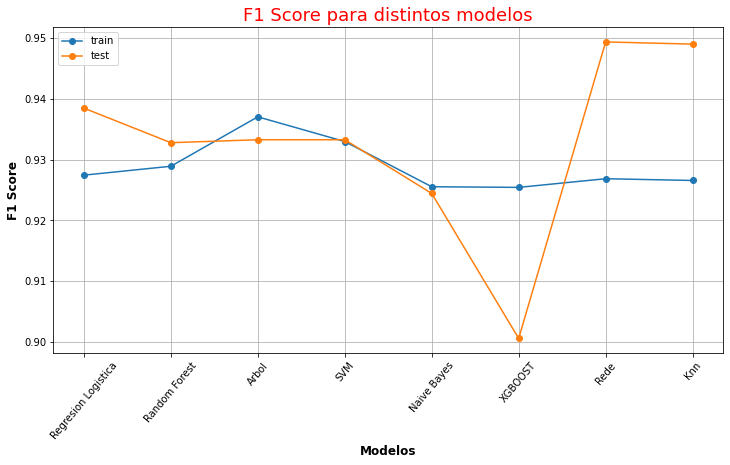

In [ ]:
#plt.plot(x = Modelosfinal["Modelo"],y = Modelosfinal["Train"] )

plt.figure(figsize=(12,6))
plt.plot(Modelosfinal["Modelo"].values, Modelosfinal["Train"].values,'o-',label='train' )
plt.plot(Modelosfinal["Modelo"].values, Modelosfinal["Test"].values,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Modelos", fontweight = "black", fontsize = 12)
plt.ylabel("F1 Score", fontweight = "black", fontsize = 12)
plt.title("F1 Score para distintos modelos", fontsize = 18, color = "r")
plt.xticks(rotation = 50)
plt.show()

# CONCLUSIONES

Una de las características importantes dentro del desarrollo de modelos de machine learning, es poder elegir un modelo que logre predecir la probabilidad o la clase para un evento de estudio. Para el caso en particular, es fundamental desarrollar un modelo que bajo las condiciones analizadas en las masas valoradas, permita definir con precisión al paciente si la masa corresponde a una condición maligna, puesto que de ello dependerá la asignación del tratamiento médico a seguir que permita proteger y prolongar la vida de un paciente.

En este caso, se cuenta con un información que demuestra tener adecuadas condiciones en su estructura y que permite generar en la gran mayoría de los casos modelos con importantes resultados estadísticos, evaluados a través de su matriz de confusión y considerando cada uno de los atributos que pueden ser considerados (precisión, recall, f1-score); no solo en la etapa de entrenamiento, sino además en la etapa de prueba para garantizar que el modelo logre generalizar de manera adecuada la precisión de los resultados.

Así entonces, se evidencia como uno de los modelos que logra reducir en menor distancia el rendimiento en la fase de entrenamiento y de prueba es con el uso de svm (máquinas de soporte vectorial), con el uso de 5 data set de pruebas (k-folds) y con la variación óptima de hiperparametros que permite conservar un f1-score (métrica usada para efectos de comparación y competencia entre los modelos) mayores al 0.93.

Por otro lado, se observa como modelos con mayores complejidades, como las redes neuronales,  logran superar en gran medida los resultados obtenidos en una etapa de prueba, pero representan un rendimiento mucho menor en etapas de entrenamiento, para este tipo de análisis no logran conservar un adecuado equilibrio.

Otro caso que sin duda alguna llama la atención es el xgboost que demuestra como en el proceso de entrenamiento logra conservar un f1-score cercano al 0.93, pero en la fase de prueba logra reducirse hasta un 0.90.

A nivel global podría interprestarse que todos los modelos logran superar unos indicadores que son positivos en términos de los resultados obtenidos, sin embargo; en asociación con el propósito del caso de estudio, se recomienda para diagnósticar un posible caso de cancer de mama un modelo SVM y Naive Bayes en segundo lugar.